In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [170]:
# Read the CSV file
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por = pd.read_csv('student-por.csv', sep=';')


In [171]:
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


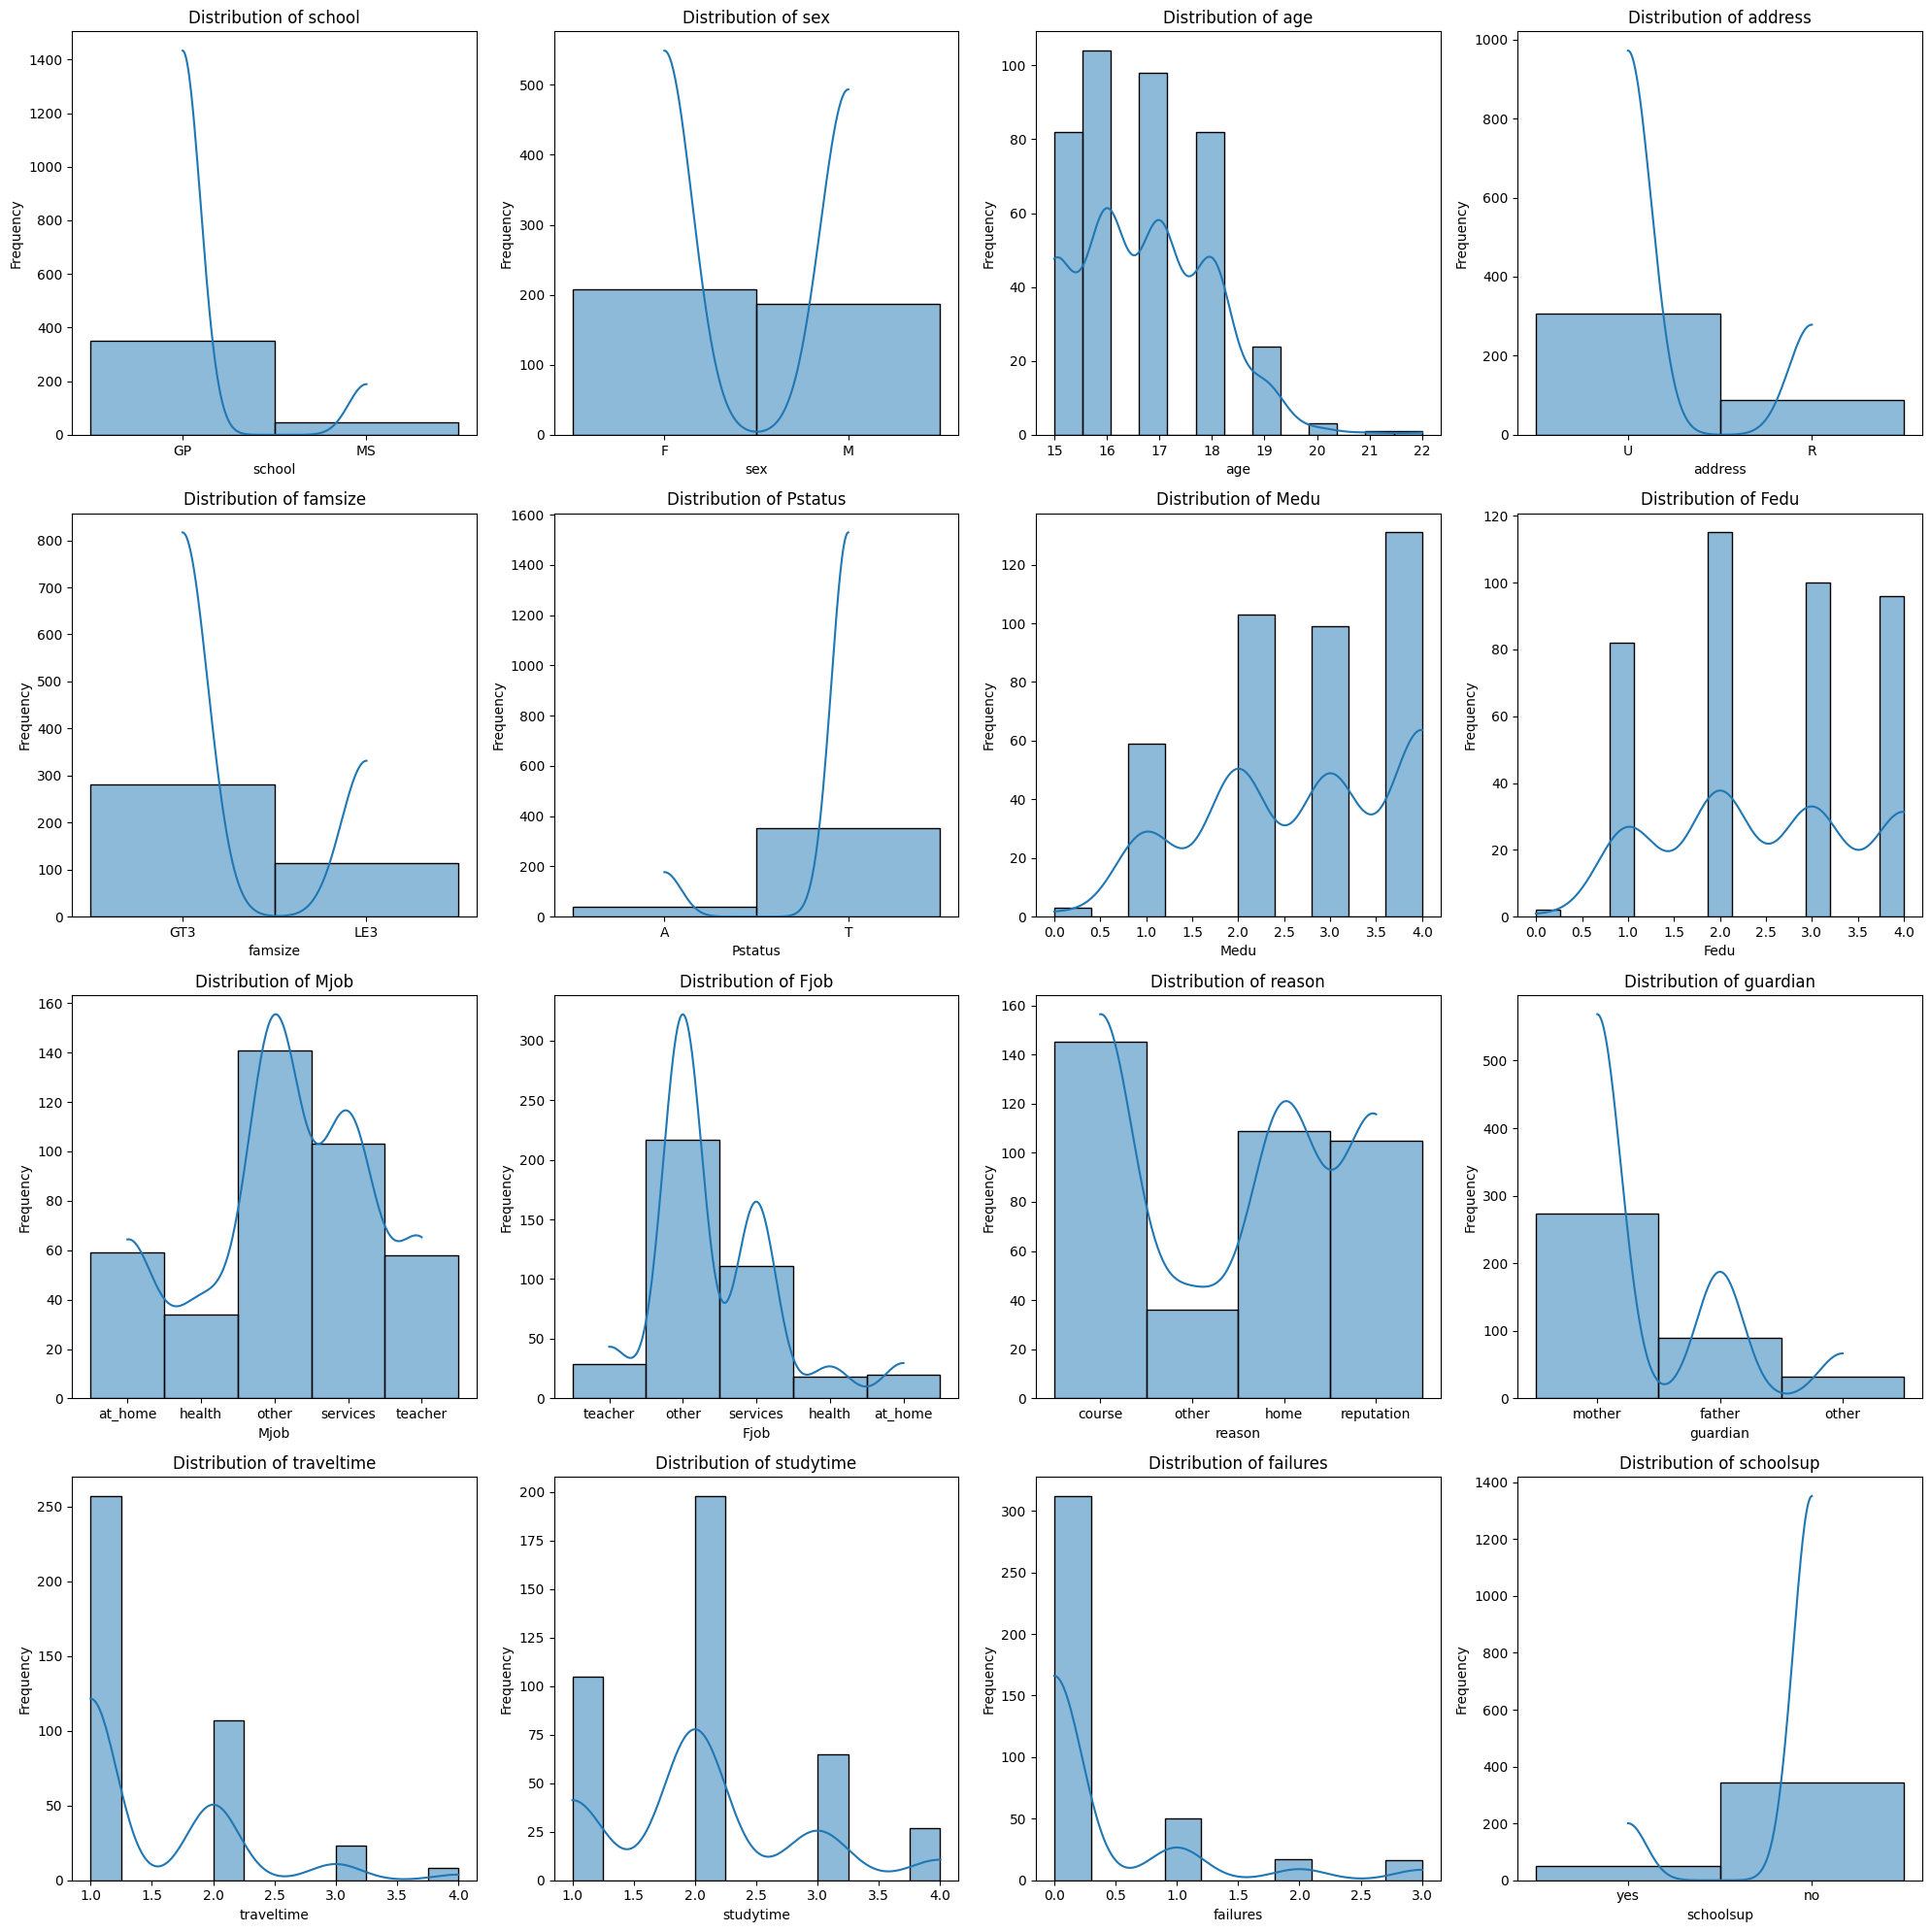

In [172]:
# features 1-16
rows, cols = 4, 4
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))  
axs = axs.flatten()

# Iterate over each column and plot
for i, column in enumerate(df_mat.columns[:16]):
    sns.histplot(df_mat[column], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

# Adjust layout for a cleaner look
plt.tight_layout()
plt.show()

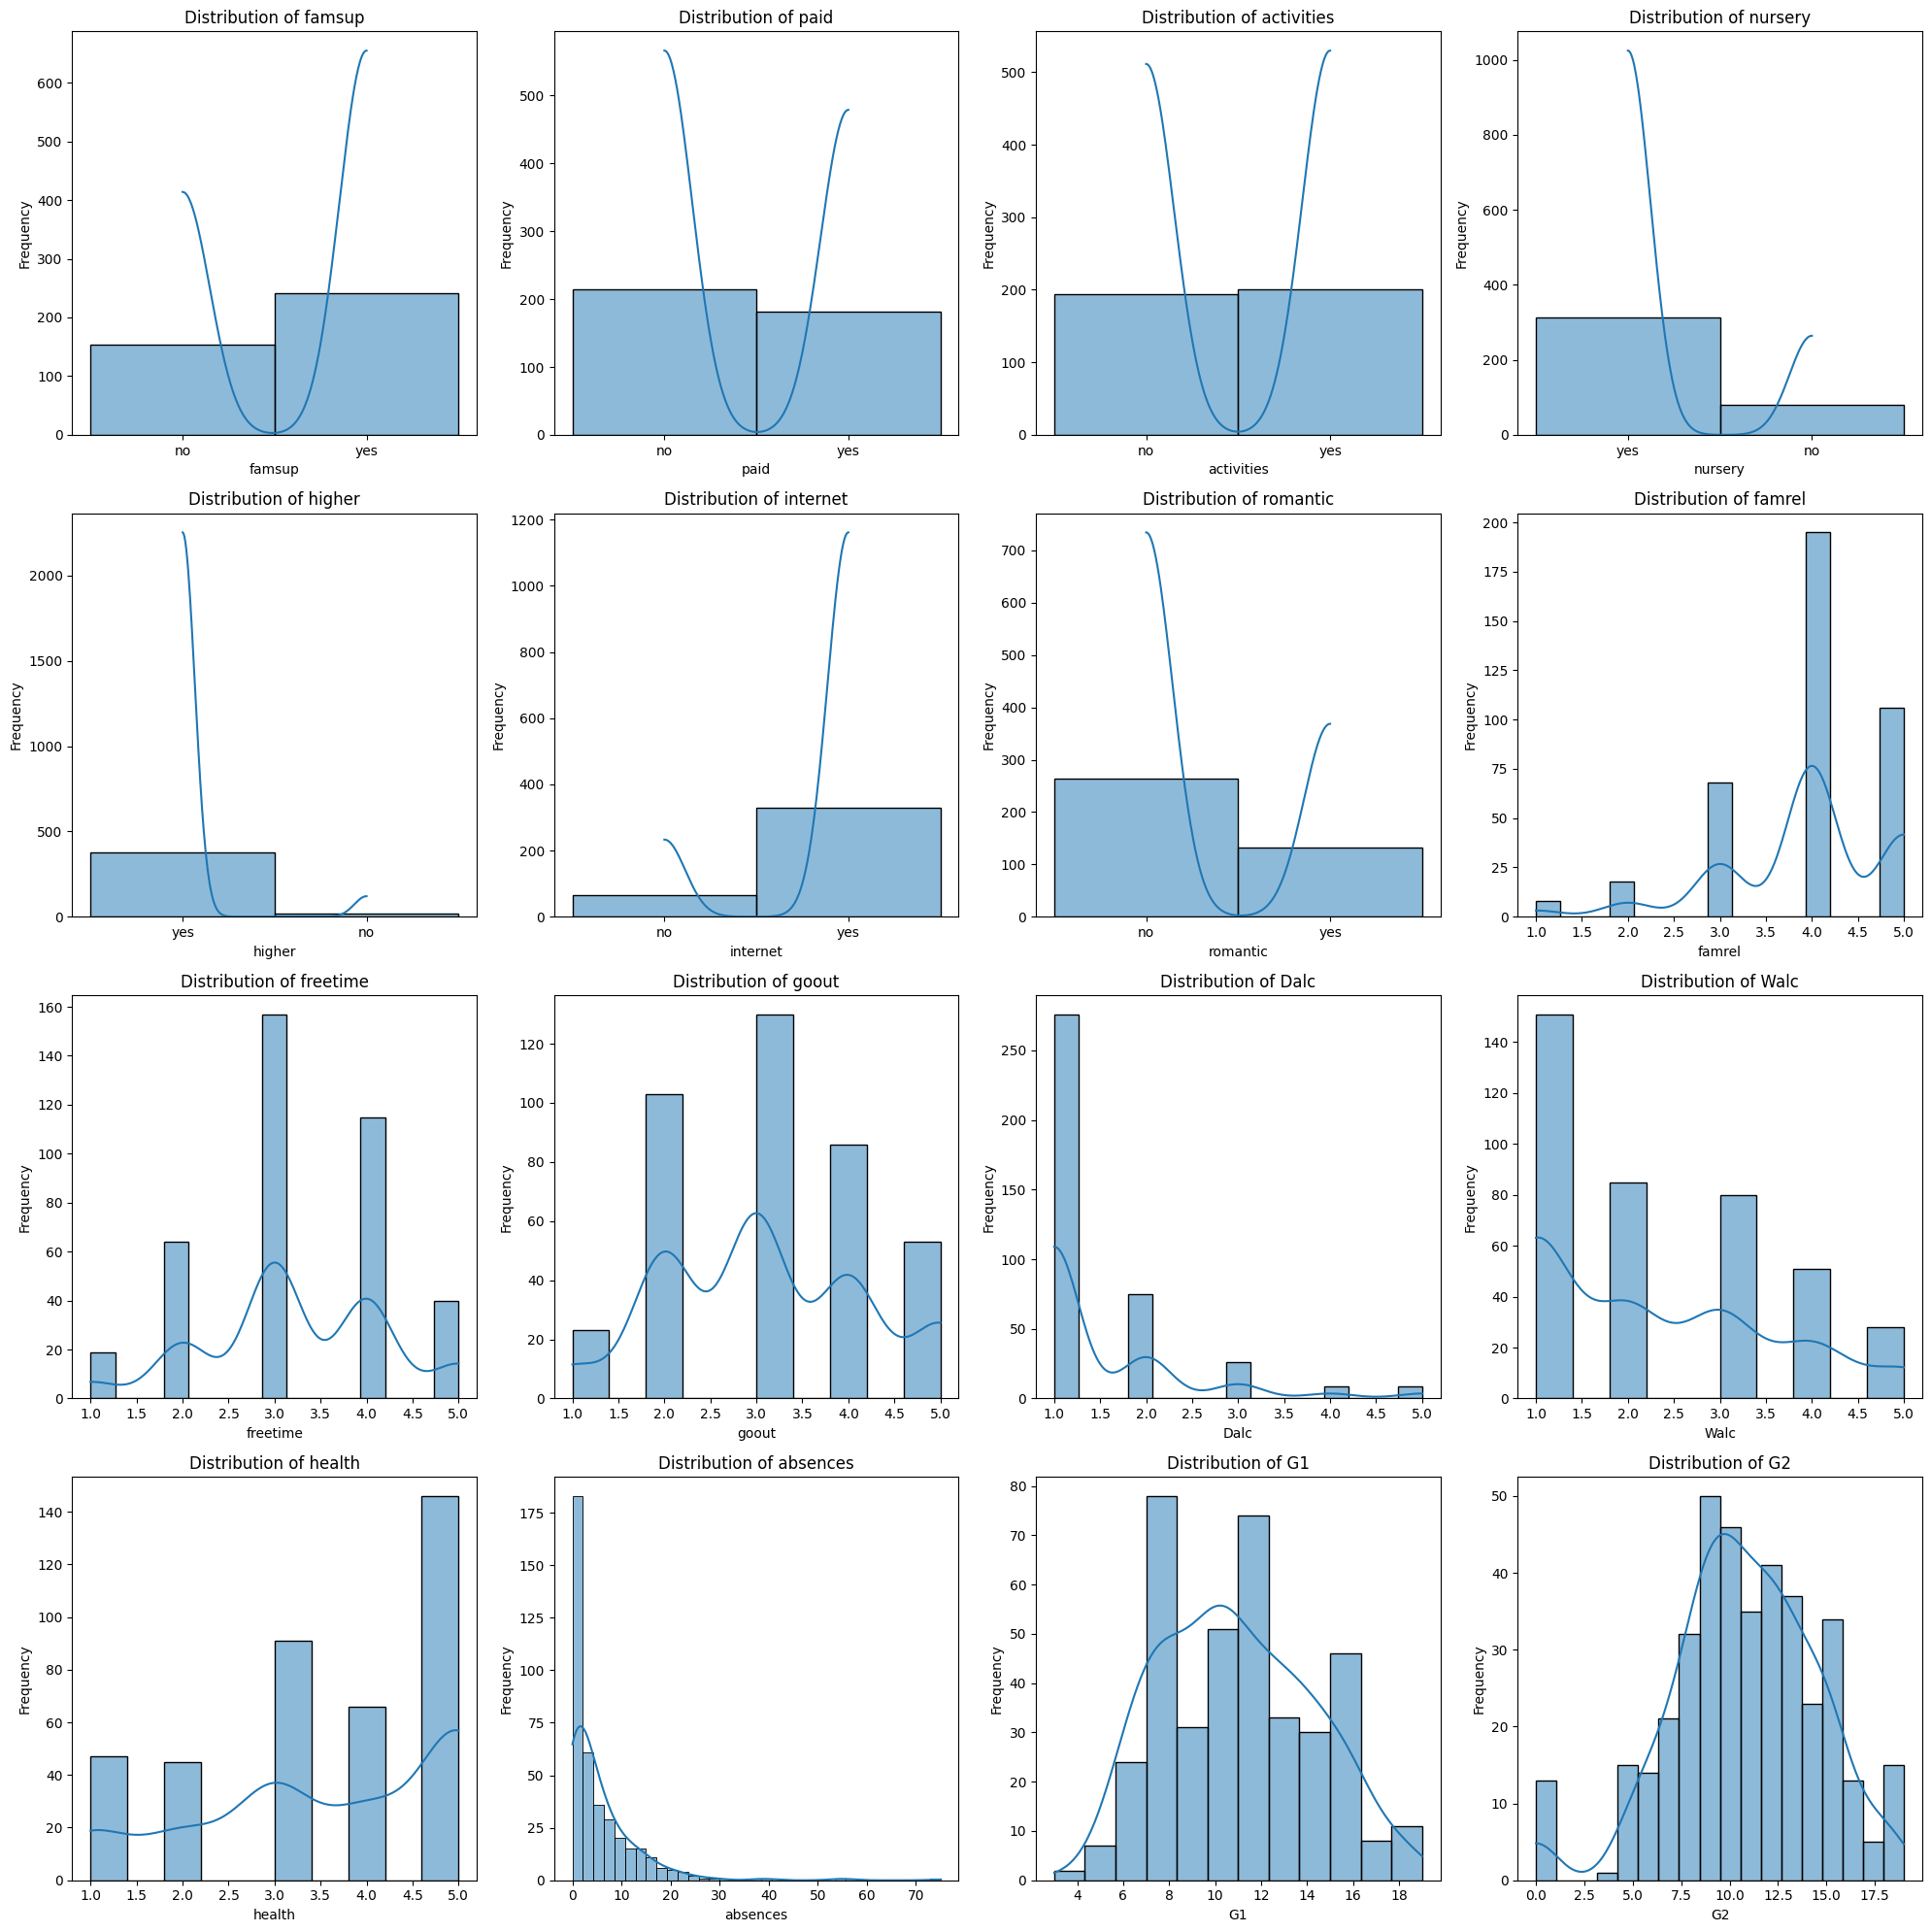

In [173]:
# features 17-32
rows, cols = 4, 4
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))  
axs = axs.flatten()

# Iterate over each column and plot
for i, column in enumerate(df_mat.columns[16:32]):
    sns.histplot(df_mat[column], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

# Adjust layout for a cleaner look
plt.tight_layout()
plt.show()

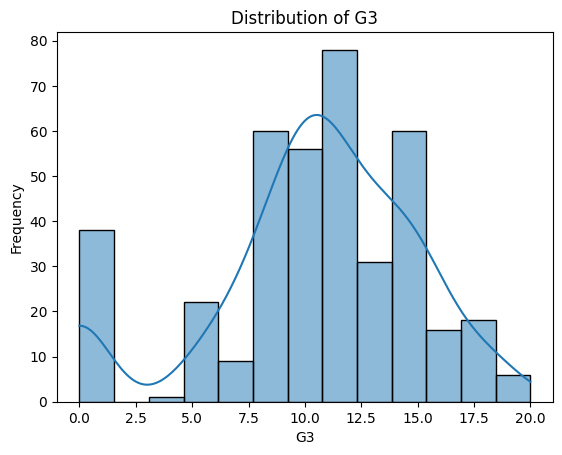

In [174]:
# response variable

column = df_mat.columns[-1]
plt.figure()
sns.histplot(df_mat[column], kde=True)
plt.title(f'Distribution of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

In [175]:
# create three grade levels
column = df_mat.columns[-1]
df_mat[column]
C_score = df_mat[column].quantile(0.33)
B_score = df_mat[column].quantile(0.67)


In [176]:
# Add a new column with conditional values (for three different dfs)
df_mat_A = df_mat.copy()
df_mat_A['A_grade'] = [1 if x > B_score else 0 for x in df_mat[df_mat.columns[-1]]]
df_mat_A = df_mat_A.drop(df_mat.columns[-1], axis=1)

df_mat_B = df_mat.copy()
df_mat_B['B_grade'] = [1 if (x < B_score and x > C_score) else 0 for x in df_mat[df_mat.columns[-1]]]
df_mat_B = df_mat_B.drop(df_mat.columns[-1], axis=1)

df_mat_C = df_mat.copy()
df_mat_C['C_grade'] = [1 if x < C_score else 0 for x in df_mat[df_mat.columns[-1]]]
df_mat_C = df_mat_C.drop(df_mat.columns[-1], axis=1)

In [177]:
# export data files
df_mat_A.to_csv('mat_A.csv')
df_mat_B.to_csv('mat_B.csv')
df_mat_C.to_csv('mat_C.csv')

In [178]:
# Add a new column with conditional values (for one df)
df_mat['A_grade'] = [1 if x > B_score else 0 for x in df_mat['G3']]
df_mat['B_grade'] = [1 if (x <= B_score and x >= C_score) else 0 for x in df_mat['G3']]
df_mat['C_grade'] = [1 if x < C_score else 0 for x in df_mat['G3']]
df_mat = df_mat.drop('G3', axis=1)

In [179]:
df_mat.to_csv('df_mat.csv')